# Titanic Passengers Survival Prediction

### Primary Goals
* Explore data features and conduct Exploratory Data Analysis (EDA) of titanic dataset with visualizations.
* Develop machine learning classification models to predict the chances of passengers survival.

In [399]:
# Import necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

import os

In [296]:
train = pd.read_csv("./Downloads/titanic/train.csv")
test = pd.read_csv("./Downloads/titanic/test.csv")

### Dataset Overview

The Titanic dataset used in this analysis contains a wealth of information about the 891 passengers who were aboard the ill-fated maiden voyage of the RMS Titanic. The dataset comprises 12 distinct variables, 11 of which serve as predictors, providing insights into the demographic and contextual attributes of the passengers. The final variable represents the crucial outcome of whether the passenger survived the disaster or not.

#### Predictor Variables

* Passenger ID: A unique identifier for each passenger.
* Pclass: The passenger's class, with options of 1st, 2nd, or 3rd class.
* Name: The full name of the passenger.
* Sex: The gender of the passenger, either "male" or "female".
* Age: The age of the passenger in years.
* SibSp: The number of siblings and spouses the passenger had aboard the Titanic.
* Parch: The number of parents and children the passenger had aboard the Titanic.
* Ticket: The unique ticket number assigned to the passenger.
* Fare: The amount the passenger paid for their ticket.
* Cabin: The cabin number assigned to the passenger.
* Embarked: The port of embarkation, with options of "C" (Cherbourg), "Q" (Queenstown), or "S" (Southampton).

#### Target Variable

* Survived: A binary indicator of whether the passenger survived the Titanic disaster (1 for survived, 0 for did not survive).

In [301]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

In [304]:
# Check for missing values in each column in train set
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [306]:
# Check for missing values in each column in test set
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [308]:
# Check data type of each column in train set
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [310]:
#Statistical measures of each column in train set
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [312]:
# Check the balance of values in Survived column
survived_counts = train['Survived'].value_counts()
print(survived_counts)

Survived
0    549
1    342
Name: count, dtype: int64


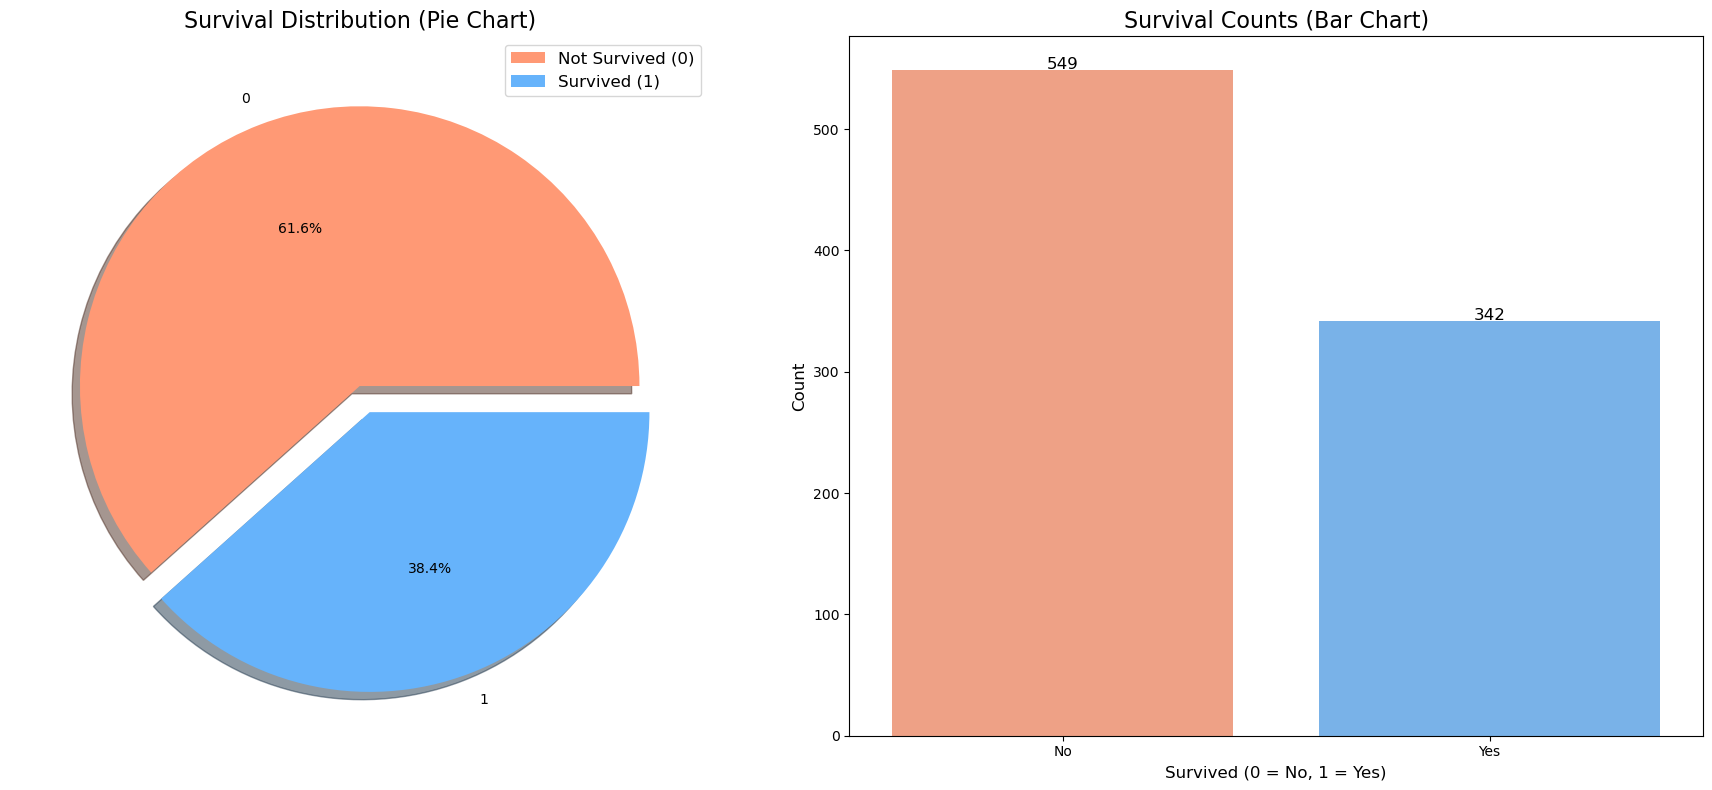

In [314]:
# Check survival ratio
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie Chart
survived_counts.plot.pie(
    explode=[0, 0.1],              
    autopct='%1.1f%%',             
    ax=ax[0],                      
    shadow=True,                   
    colors=['#ff9975', '#66b3fb']
)
ax[0].set_title('Survival Distribution (Pie Chart)', fontsize=16)
ax[0].set_ylabel('')              
ax[0].legend(['Not Survived (0)', 'Survived (1)'], loc='upper right', fontsize=12)

# Bar Chart
sns.barplot(
    x=survived_counts.index, 
    y=survived_counts.values, 
    ax=ax[1], 
    palette=['#ff9975', '#66b3fb']
)
ax[1].set_title('Survival Counts (Bar Chart)', fontsize=16)
ax[1].set_xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].set_xticklabels(['No', 'Yes'], fontsize=10)

# Add value annotations on the bars
for i, val in enumerate(survived_counts.values):
    ax[1].text(i, val + 0.5, str(val), ha='center', fontsize=12, color='black')

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### Observations

The survival data is imbalanced, with approximately 60% of passengers not surviving (label 0) and only 40% surviving (label 1). This indicates that about two-thirds of the population did not survive.

This imbalance highlights the importance of examining the relationships between survival and other features in the dataset to uncover potential factors influencing survival outcomes.

### Feature Exploration

#### Feature Types
We first need to identify different feature types: 

* **Numerical features: Age, Fare**

  These are continous features that are quantitative and can take fractional or decimal values, which can be directly used for numercial computations and statistical analysis.
  
* **Ordinal features: Pclass**

  Ordinal variable is different from categorical variables in its relative ordering and sorting between the values. While the vaues of ordinal variables can be numerical, the numbers represent ranks rather than quantities, and the difference between the values may not be uniform.
  
* **Categorical features: Sex, Embarked**

    Categorical features are variables that have two or more categories, and each value in the feature can be categorised by them. These variables are qualitative and do not have a meaningful order.
  
  

#### Feature Analysis
##### Age Feature

In [320]:
print('Average age of passengers on the ship:', train['Age'].mean(), 'Years')
print('The youngest age of passengers on the ship:', train['Age'].min(), 'Years')
print('The oldest age of passengers on the ship:', train['Age'].max(), 'Years')

Average age of passengers on the ship: 29.69911764705882 Years
The youngest age of passengers on the ship: 0.42 Years
The oldest age of passengers on the ship: 80.0 Years


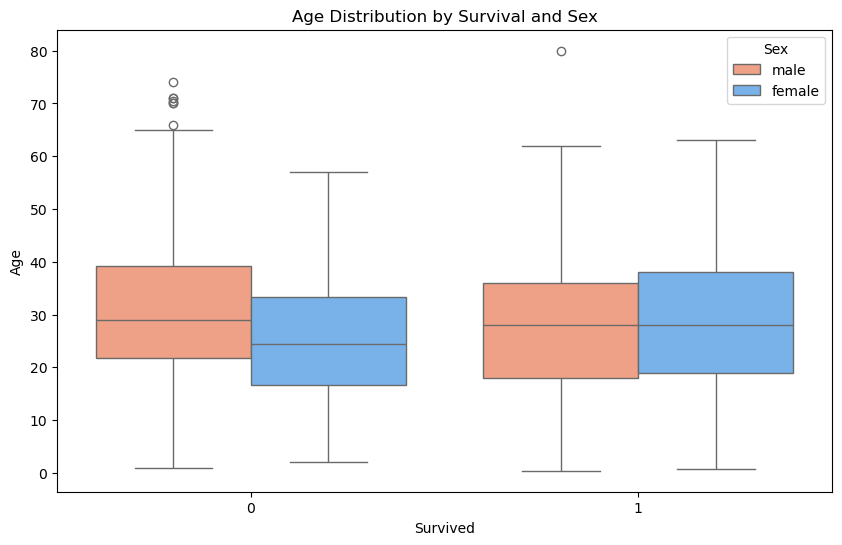

In [322]:
plt.figure(figsize=(10,6)) 
sns.boxplot(x="Survived", y="Age", data=train, hue="Sex", palette=['#ff9975', '#66b3fb'])  # Use palette for colors

plt.title("Age Distribution by Survival and Sex")
plt.show()


##### Observations
* The median age of survivors is lower than that of non-survivors, supporting the idea that younger individuals had a higher chance of survival.
* Survivors have a wider age spread but are concentrated in younger age groups, whereas non-survivors have a higher median age and a smaller spread, meaning most were middle-aged or older.
* Female survivors tend to have a slightly higher median age than male survivors, but both groups are mostly younger.
*  For males, survival decreased with age, as younger males has a better chance of survival compared to older males, which is proved by the fact that the median age of male survivors is lower than that of non-survivors.

##### Sex Feature

In [326]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

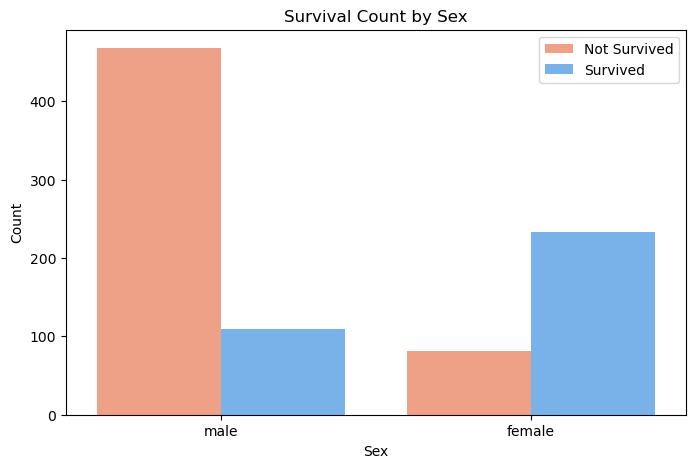

In [328]:
plt.figure(figsize=(8,5))
sns.countplot(x="Sex", hue="Survived", data=train, palette=["#ff9975", "#66b3fb"])
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(["Not Survived", "Survived"])
plt.show()

##### Observation
* Females had a significantly higher survival rate than males. The bar plot shows that a larger proportion of females survived, while a higher number of males did not survive.
* Survival was notably biased in favor of females despite the overwhelming number of male passengers. 

##### Fare Feature

In [332]:
print('The highest fare was:',train['Fare'].max())
print('The lowest fare was:',train['Fare'].min())
print('The average fare was:',train['Fare'].mean())

The highest fare was: 512.3292
The lowest fare was: 0.0
The average fare was: 32.204207968574636


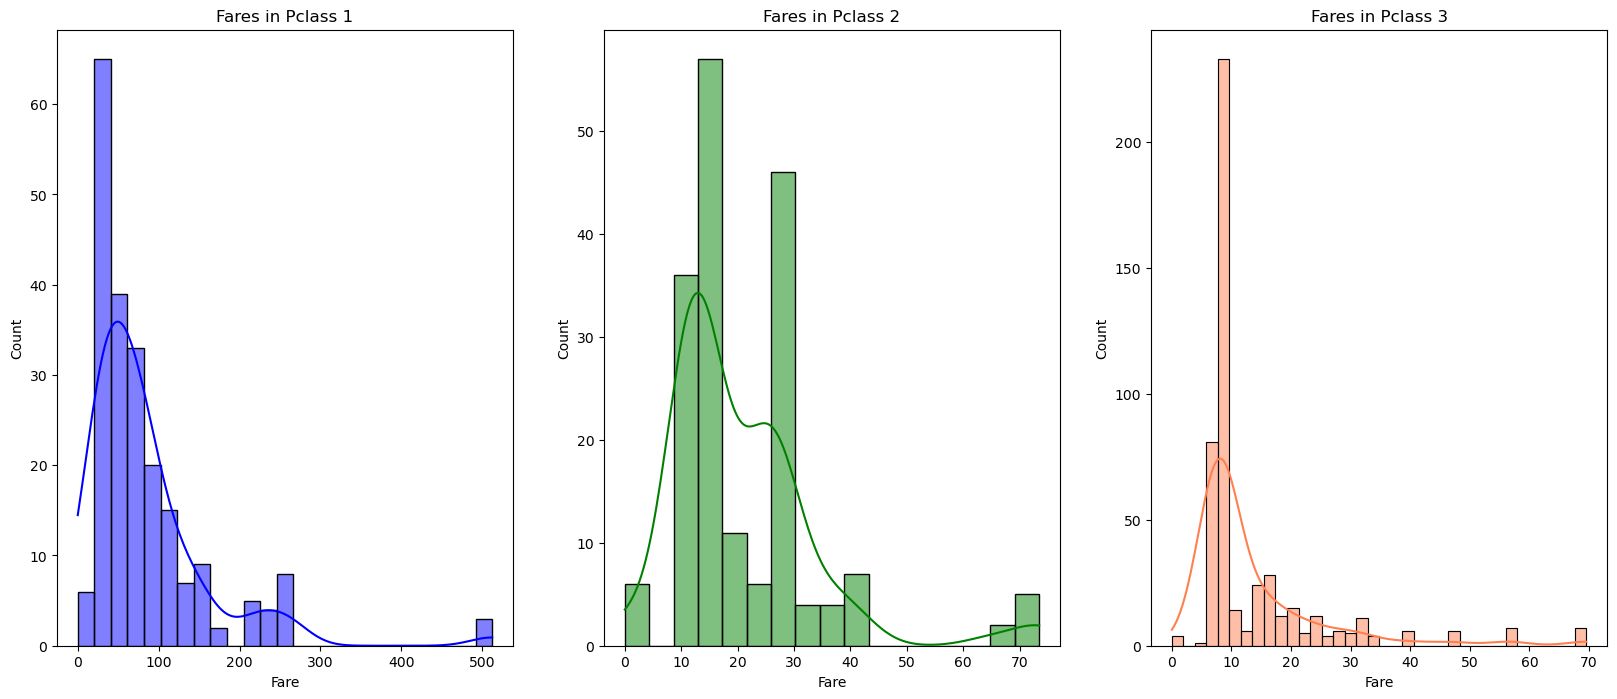

In [334]:
# Create subplots
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot Fare distribution for Pclass 1
sns.histplot(train[train['Pclass'] == 1]['Fare'], ax=ax[0], kde=True, color='blue')
ax[0].set_title('Fares in Pclass 1')

# Plot Fare distribution for Pclass 2
sns.histplot(train[train['Pclass'] == 2]['Fare'], ax=ax[1], kde=True, color='green')
ax[1].set_title('Fares in Pclass 2')

# Plot Fare distribution for Pclass 3
sns.histplot(train[train['Pclass'] == 3]['Fare'], ax=ax[2], kde=True, color='coral')
ax[2].set_title('Fares in Pclass 3')

# Show the plot
plt.show()


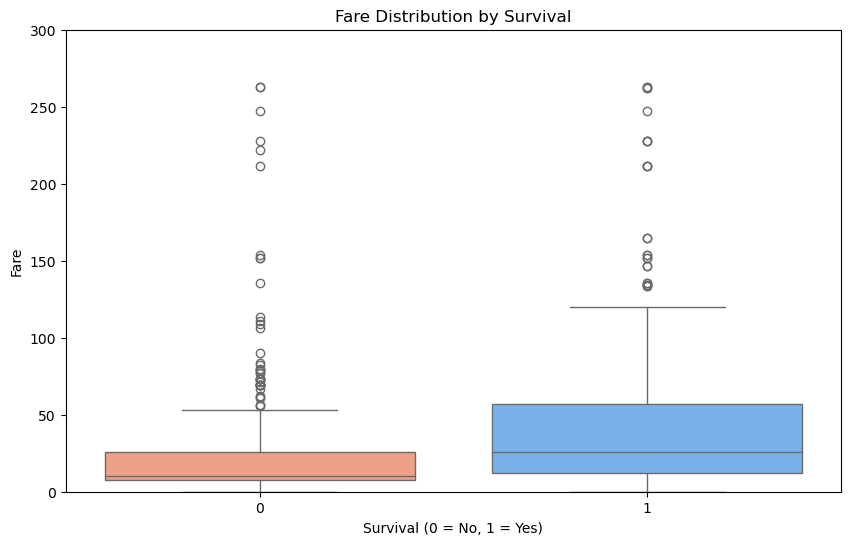

In [335]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Survived", y="Fare", data=train, palette=["#ff9975", "#66b3fb"])
plt.title("Fare Distribution by Survival")
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.ylim(0, 300)  
plt.show()

##### Observations
* The fare distribution is highly skewed, as Fares are highest for Pclass 1 and lowest for Pclass 3.
* Pclass 3 had the most passengers paying very low fares, meaning it was the most accessible class for lower-income travelers.
* Most passengers who paid lower fares did not survive.
* The fare distribution for non-survivors is mostly concentrated in the lower range.
* Higher fares seem to be correlated with a higher chance of survival.

##### Pclass Feature

In [340]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


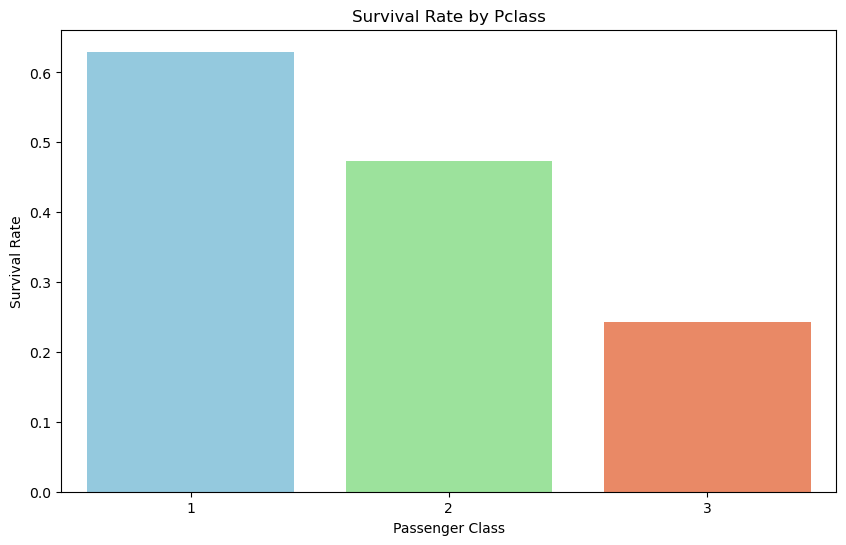

In [342]:
plt.figure(figsize=(10,6))
sns.barplot(x="Pclass", y="Survived", data=train, ci=None, palette=['skyblue','lightgreen','coral'])
plt.title("Survival Rate by Pclass")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

##### Observations
* Higher-class passenger had a higher chance of the survival rate.
* The survival rate was highest in Pclass 1, followed by Pclass 2, and lowest in Pclass 3.
This suggests class privilege in survival, as first-class passengers had better access to lifeboats.

In [345]:
# Examine the relationship between Survival with Sex and Pclass
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')


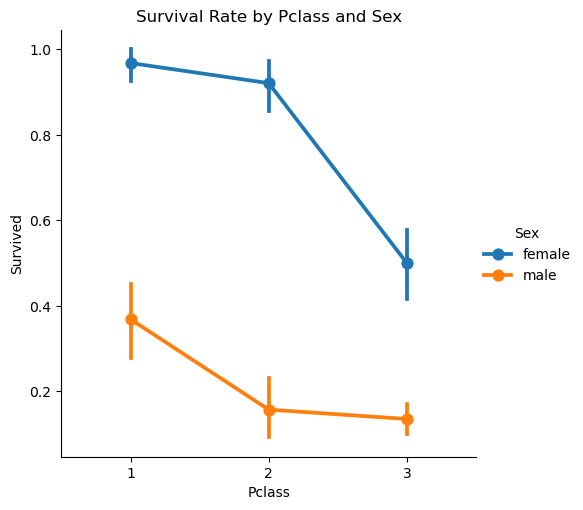

In [347]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=train,kind='point')
plt.title("Survival Rate by Pclass and Sex")
plt.show()

##### Observations
* The survival for females from Class 1 is about 96-97%, while first-class male survival was significantly lower. This suggests that women in higher-class cabins were given top priority during the rescue process.
* Class privilege played a role in survival, as first-class passengers had better access to lifeboats and priority in evacuation, leading to significantly higher survival rates compared to lower-class passengers.

##### Feature Embarked

In [351]:
# Crosstab for detailed analysis
pd.crosstab([train.Embarked,train.Pclass],[train.Sex,train.Survived], margins=True).style.background_gradient(cmap='summer_r')

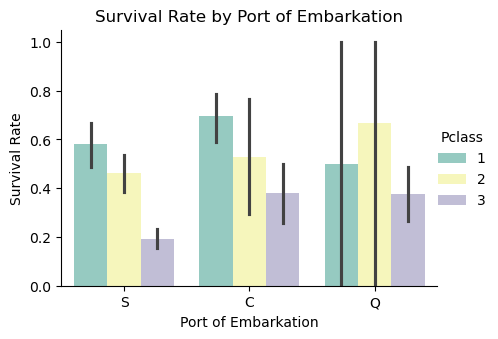

In [353]:
# Corrected visualization using sns.catplot()
sns.catplot(x="Embarked", y="Survived", hue="Pclass", data=train, kind="bar", palette="Set3")

# Adjust figure size
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.title("Survival Rate by Port of Embarkation")
plt.xlabel("Port of Embarkation")
plt.ylabel("Survival Rate")

plt.show()

##### Obervations:
* Port Cherbourg (C) had the highest survival rate among all the ports of embarkation, specifically in the first-class passengers, while Southampton survival rate is the lowest.
* First class passengers had the highest survival rate at all embarkation points. 

##### Feature SibSp

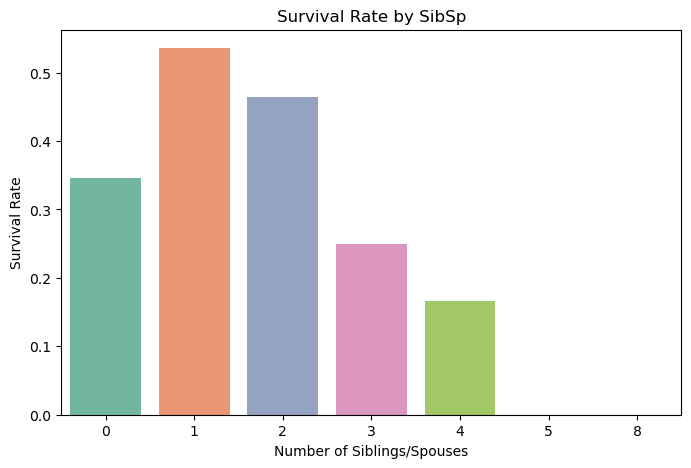

In [357]:
# Examine the correlation between the survival rate and number of siblings/spouses
plt.figure(figsize=(8,5))
sns.barplot(x="SibSp", y="Survived", data=train, ci=None, palette="Set2")
plt.title("Survival Rate by SibSp")
plt.xlabel("Number of Siblings/Spouses")
plt.ylabel("Survival Rate")
plt.show()


##### Observations
* Larger families had lower chance of survival, and small families with fewer siblings/spouses had better survival rates.
* Passengers traveling alone had moderate survival rate.

##### Feature Parch

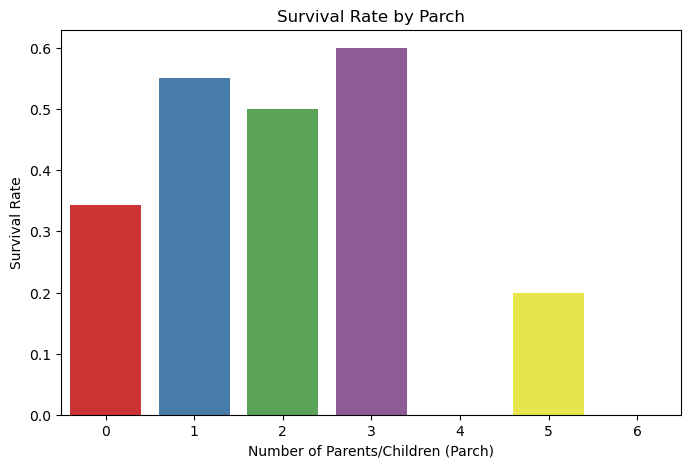

In [361]:
plt.figure(figsize=(8,5))
sns.barplot(x="Parch", y="Survived", data=train, ci=None, palette="Set1")
plt.title("Survival Rate by Parch")
plt.xlabel("Number of Parents/Children (Parch)")
plt.ylabel("Survival Rate")
plt.show()


##### Observations
* Passengers in larger families had lower survial rates.
* Passengers with small families had higher survival rates, while solo passengers had a moderate survival rate.

### Feature Engineering

#### Handling Missing Values

In [366]:
# Fill missing values in "Embarked" with the most frequent value (mode)
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)

In [368]:
# Fill missing values in "Fare" with the median
train["Fare"].fillna(train["Fare"].median(), inplace=True)

In [370]:
# Fill missing "Age" values with the median age of passengers in the same Pclass
train["Age"] = train["Age"].fillna(train.groupby("Pclass")["Age"].transform("median"))

#### Encoding Categorical Variables

In [373]:
# Convert "Sex" into binary (0 = Male, 1 = Female)
train["Sex"] = train["Sex"].map({"male": 0, "female": 1})

# One-Hot Encoding for "Embarked" (drop the first category to avoid multicollinearity)
train = pd.get_dummies(train, columns=["Embarked"], drop_first=True)

#### Feature Creation

In [376]:
# Create "FamilySize" feature (Total family members onboard)
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

In [378]:
# Create "IsAlone" feature (1 = traveling alone, 0 = traveling with family)
train["IsAlone"] = (train["FamilySize"] == 1).astype(int)

In [380]:
# Extract Title from Name
train["Title"] = train["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)

In [382]:
# Group rare titles together
title_mapping = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs",
    "Lady": "Rare", "Countess": "Rare", "Capt": "Rare", "Col": "Rare",
    "Don": "Rare", "Dr": "Rare", "Major": "Rare", "Rev": "Rare",
    "Sir": "Rare", "Jonkheer": "Rare", "Dona": "Rare"
}
train["Title"] = train["Title"].replace(title_mapping)


In [384]:
# Encode "Title" using Label Encoding
title_encoder = LabelEncoder()
train["Title"] = title_encoder.fit_transform(train["Title"])

#### Normalization

In [387]:
# Standardize "Age" and "Fare" (Z-score normalization)
scaler = StandardScaler()
train[["Age", "Fare"]] = scaler.fit_transform(train[["Age", "Fare"]])

#### Feature Selection

In [390]:
# Choose important features for training and eliminate irrelevant features
# Drop irrelevant columns
train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

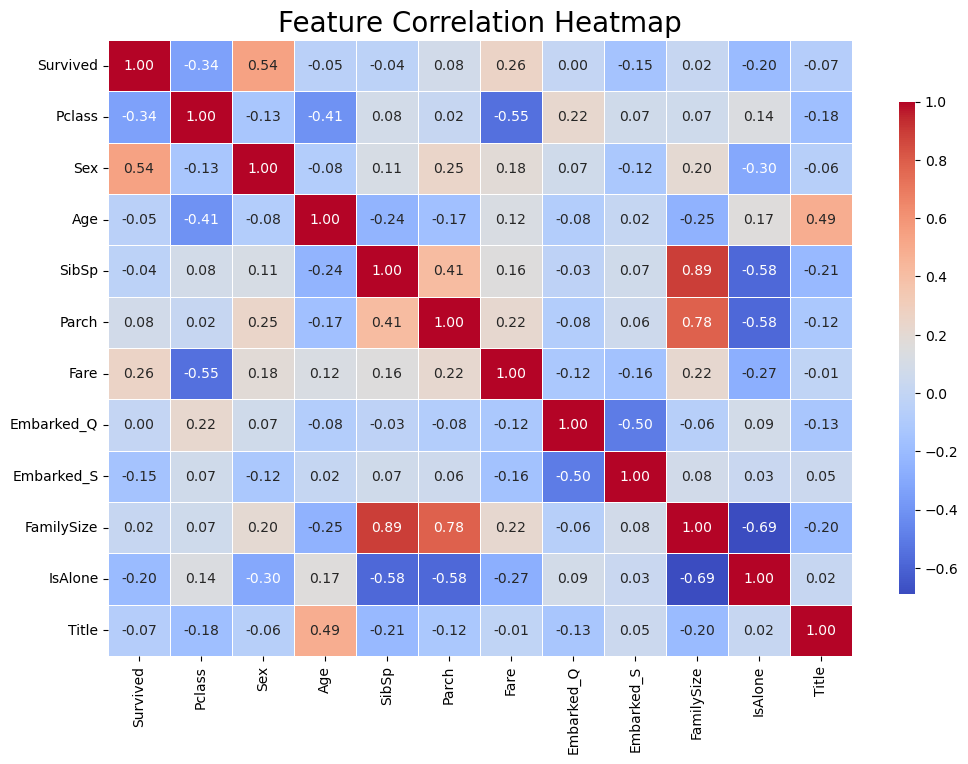

In [392]:
# Create correlation heatmap for all features
# Set figure size
plt.figure(figsize=(12, 8))
# Create heatmap
sns.heatmap(
    train.corr(), 
    annot=True,  
    fmt=".2f",   
    cmap='coolwarm', 
    linewidths=0.5,  
    annot_kws={'size': 10}, 
    cbar_kws={'shrink': 0.8, 'aspect': 30}  
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Feature Correlation Heatmap", fontsize=20)
plt.show()

### Data Processing and Modelling

In [406]:
# Split the dataset
X = train.drop(columns=['Survived'])
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply undersampling for imbalanced classes
undersampler = RandomUnderSampler(random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

# Define model
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "XGBoost": xgb.XGBClassifier(),
}

# Dictionary to store model accuracy
model_accuracies = {}

# Train and evaluate models
for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model) 
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy  # Store results
    
    print(f"{name}: Accuracy = {accuracy:.2f}\n")
    print(classification_report(y_test, y_pred))
    print("="*50)

Logistic Regression: Accuracy = 0.82

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       105
           1       0.74      0.86      0.80        74

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.82      0.82       179

Decision Tree: Accuracy = 0.77

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       105
           1       0.71      0.76      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179

Random Forest: Accuracy = 0.85

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       105
           1       0.79      0.86      0.83        74

    accuracy                           0.85       179
   macro avg       0.84   

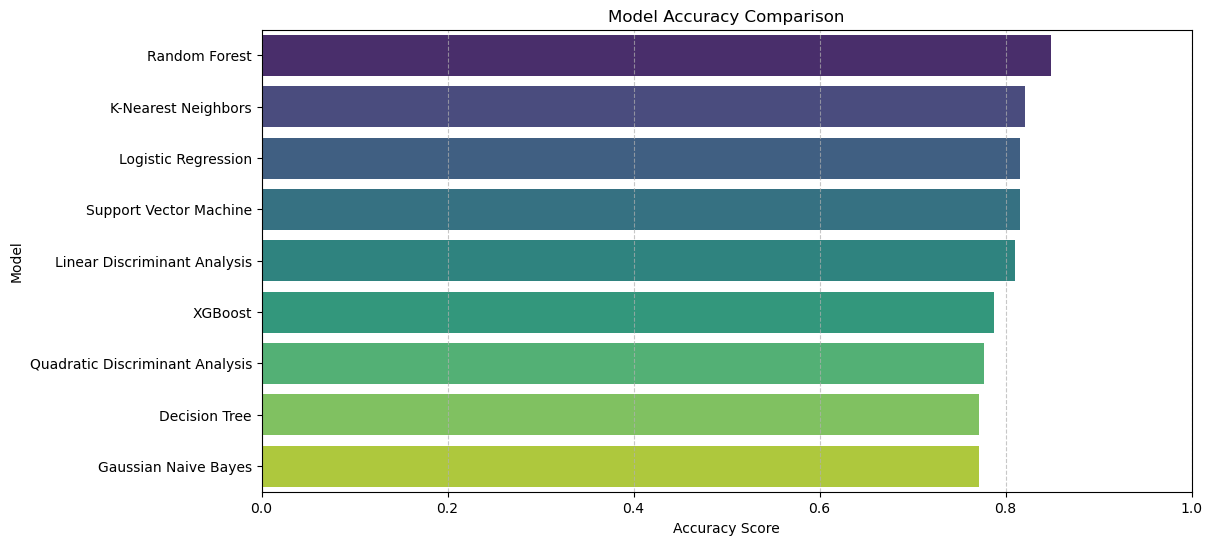

In [408]:
# Convert results to DataFrame for plotting
accuracy_df = pd.DataFrame(model_accuracies.items(), columns=["Model", "Accuracy"])

# Sort models by accuracy
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=accuracy_df, x="Accuracy", y="Model", palette="viridis")

# Customize plot
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()


#### Observations

- Random Forest (85% accuracy) outperformed all models, likely due to its ability to handle feature interactions and reduce overfitting.
- Logistic Regression, SVM, and KNN (82% accuracy) performed well, suggesting that the decision boundary in the data is relatively linear. In contrast, Naive Bayes (77%) and QDA (78%) had lower accuracy, possibly due to their strong distributional assumptions.
- Random Forest significantly outperformed Decision Trees (76%), reinforcing the advantage of ensemble methods in improving generalization.
- Simpler models like Logistic Regression and LDA generalized well, whereas more complex models like Decision Trees and XGBoost may have slightly overfitted.

In [413]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define hyperparameter grids for selected models
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"]
    },
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "rbf"]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10],
        "learning_rate": [0.01, 0.1, 0.2]
    }
}

# Apply GridSearchCV for each model
best_models = {}

for name, model in models.items():
    if name in param_grids:  # Only tune selected models
        print(f"Tuning {name}...")
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring="accuracy", n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Best Params for {name}: {grid_search.best_params_}")

# Evaluate best models
for name, model in best_models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Tuned Accuracy = {accuracy:.2f}\n")
    print(classification_report(y_test, y_pred))
    print("="*50)


Tuning Logistic Regression...
Best Params for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Tuning Decision Tree...
Best Params for Decision Tree: {'max_depth': 3, 'min_samples_split': 2}
Tuning Random Forest...
Best Params for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Tuning Support Vector Machine...
Best Params for Support Vector Machine: {'C': 1, 'kernel': 'rbf'}
Tuning XGBoost...
Best Params for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Logistic Regression: Tuned Accuracy = 0.82

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       105
           1       0.74      0.86      0.80        74

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.82      0.82       179

Decision Tree: Tuned Accuracy = 0.80

              precision    recall  f1-score   support

           0       0.80 

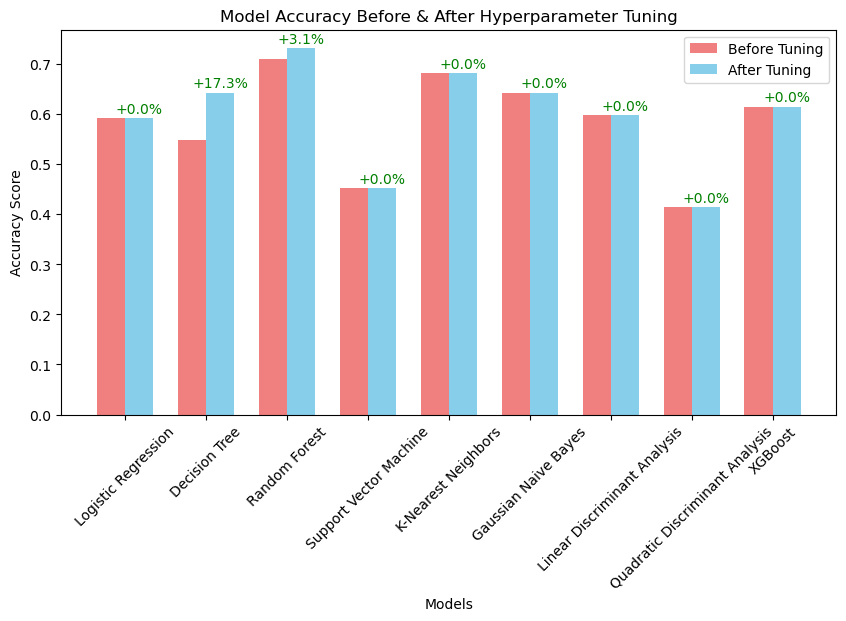

In [415]:
import numpy as np
import matplotlib.pyplot as plt

# Store accuracy before tuning
before_tuning = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    before_tuning[name] = accuracy_score(y_test, y_pred)

# Store accuracy after tuning
after_tuning = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    after_tuning[name] = accuracy_score(y_test, y_pred)

# Convert results into lists for plotting
model_names = list(before_tuning.keys())
before_values = [before_tuning[name] for name in model_names]
after_values = [after_tuning.get(name, before_tuning[name]) for name in model_names]  # Default to before value if not tuned

# Bar chart for accuracy comparison
x = np.arange(len(model_names))
width = 0.35  # Width of bars

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, before_values, width, label='Before Tuning', color='lightcoral')
bars2 = ax.bar(x + width/2, after_values, width, label='After Tuning', color='skyblue')

# Labels and title
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy Score")
ax.set_title("Model Accuracy Before & After Hyperparameter Tuning")
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

# Annotate percentage improvement
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    improvement = (height2 - height1) * 100 / height1 if height1 > 0 else 0
    ax.text(bar2.get_x() + bar2.get_width()/2, height2 + 0.01, f"+{improvement:.1f}%", ha='center', fontsize=10, color='green')

# Show plot
plt.show()


#### Observations
- The Decision Tree model gained a substantial 17.3% increase in accuracy score, became the largest improvement among all the models.
- In contrast, most other models, including Random Forest, Support Vector Machine, and K-Nearest Neighbors, saw relatively smaller increases of 0-3.1% in their accuracy scores after tuning. While these improvements are still noteworthy, they are more modest compared to the Decision Tree model's remarkable performance boost.